## SIMPLE LINEAR REGRESSION

##### IMPORTING LIBREARY

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

##### IMPORTING DATASET

In [2]:
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print('Number of rows in dataset ',df.shape[0])
print('Number of columns in dataset ',df.shape[1])

Number of rows in dataset  25
Number of columns in dataset  2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

* there os 25 number of records with int and float type.
* no null value present in dataset means our datset is clear.

##### 5 point summary

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


* maximum hours study is 9hours and minimum is 1 hour
* the minimum marks score is 17 and highest is 96 

##### EDA

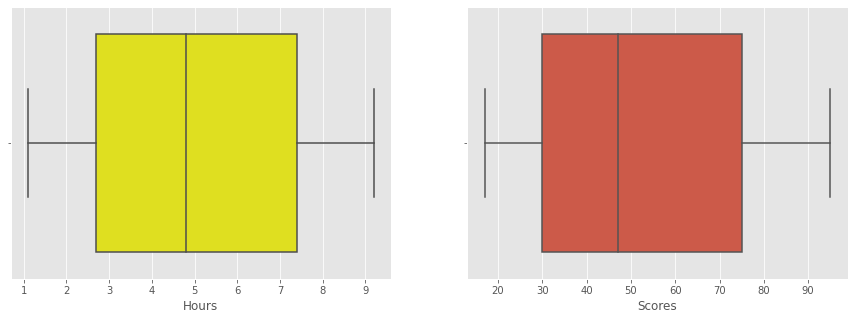

In [48]:
#BOXPLOT
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df['Hours'],ax=axes[0],color='yellow')
sns.boxplot(df['Scores'],ax=axes[1])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

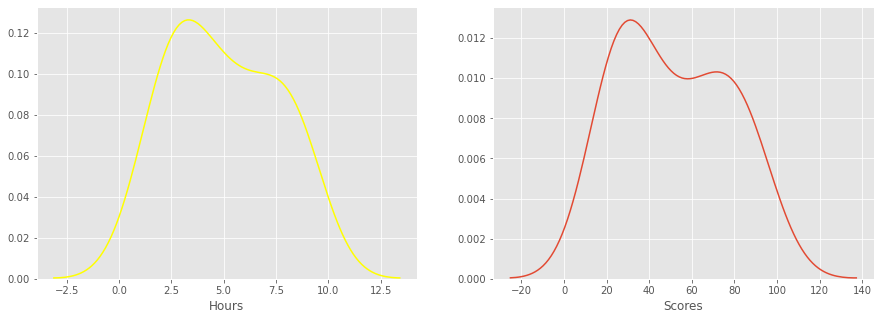

In [47]:
#HISTOGRAM
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Hours'],ax=axes[0],color='yellow',hist=False)
sns.distplot(df['Scores'],ax=axes[1],hist=False)
plt.show

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


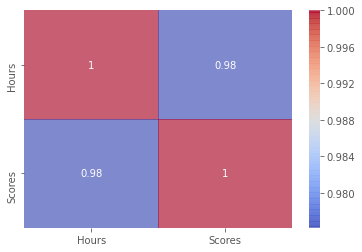

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',alpha=0.6)
plt.show()

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

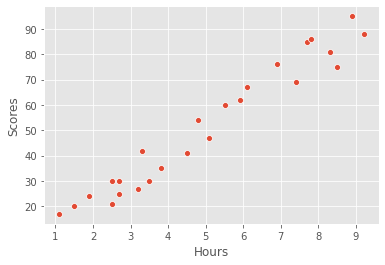

In [10]:
sns.scatterplot(df['Hours'],df['Scores'])
plt.show()

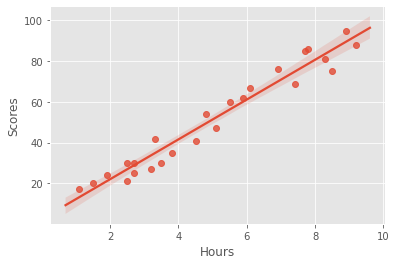

In [11]:
sns.regplot(df['Hours'],df['Scores'])
plt.show()

* no outliers present in this dataset
* from the above heatmap and regplot we can see their is perfect positive correlation with target variable 
* hours is 0.976 correlated with score means near to 1 

##### DIVIDING X AND Y

In [12]:
X=df[['Hours']]
y=df['Scores']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

##### fitting the model

In [14]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr.coef_

array([9.87171443])

In [17]:
lr.intercept_

1.495142109236383

##### predicting on model

In [18]:
y_pred=lr.predict(X_test)
y_train1=lr.predict(X_train)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

In [20]:

print('ON TRAIN DATA')
print('r2 square for traiing data is ',r2_score(y_train,y_train1))
print('RMSE IS ',np.sqrt(mean_squared_error(y_train,y_train1)))
print('\n')

print('ON TEST DATA')
print('r2 square for testing data is ',r2_score(y_test,y_pred))
print('RMSE IS ',np.sqrt(mean_squared_error(y_test,y_pred)))

ON TRAIN DATA
r2 square for traiing data is  0.9570735354094693
RMSE IS  5.55451986094803


ON TEST DATA
r2 square for testing data is  0.9309458862687437
RMSE IS  5.0673878451608445


In [21]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


#### Evaluting

In [22]:
hours=[[9.25]]

score=lr.predict(hours)
print('If student study for 9.25 hours he can score ',score)

If student study for 9.25 hours he can score  [92.80850057]


##### Cross checking with formula and OLS model

In [29]:
import statsmodels.api as sm
Xc=sm.add_constant(X)

model=sm.OLS(y,Xc).fit()
model.params

const    2.483673
Hours    9.775803
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           9.13e-17
Time:                        20:12:03   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
b0=2.4837
b1=9.7758
hours=9.25

In [34]:
scr=b0+hours*b1
print('If student study for 9.25 hours he can score ',scr)

If student study for 9.25 hours he can score  92.90985


#### MAKING FOR PROGRAN for prediction for any hours

In [51]:
h=float(input('Enter the Hours you study :'))
b0=2.4837
b1=9.7758

sr=b0+h*b1
print('if you study for ',h,' then you can score ',sr)

Enter the Hours you study :9.25
if you study for  9.25  then you can score  92.90985
